# Code for post about unequal access to the internet
Emilio Lehoucq<br>
6/14/23

## Loading libraries

In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from matplotlib import colors

## Defining paths

In [2]:
data_path = '../../data/'
plots_path = '../../plots/published/'

## Reading data

In [3]:
data = pd.read_csv(data_path + 'world_bank_internet_data.csv')

## Cleaning data

In [4]:
# There's no data before 1990
data.drop(data.loc[:,'1960':'1989'].columns, axis = 1, inplace = True)

# Creating new column with most recent measurement for each country
# https://stackoverflow.com/questions/57689645/select-the-most-right-column-without-nan-value-in-a-pandas-dataframe
data['most_recent'] = data.loc[:, '1990':].ffill(axis = 1).iloc[:, -1]

# Converting values to numeric
data.loc[:, '1990':] = data.loc[:, '1990':].apply(pd.to_numeric)

## Exploring data

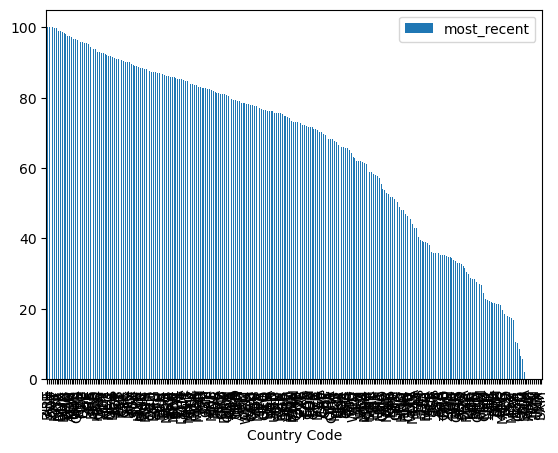

In [5]:
data[['Country Code', 'most_recent']].sort_values('most_recent', ascending = False).plot.bar(x = 'Country Code', y = 'most_recent')
plt.show()

There's clear inequality, but this is not a great way to visualize the data...

## Plot for post

https://geopandas.org/en/stable/docs/user_guide/mapping.html <br>
https://geopandas.org/en/stable/gallery/choro_legends.html

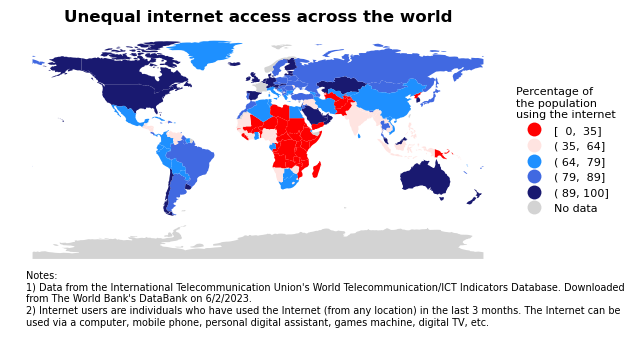

In [6]:
# Preparing data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data_merged = world.merge(data, how = 'left', left_on = 'iso_a3', right_on = 'Country Code')

# Plot
ax = data_merged.plot(
    column = 'most_recent',
    scheme = 'QUANTILES',
    k = 5,
    legend = 'True',
    legend_kwds = {
        "loc": "center left",
        "bbox_to_anchor": (1, 0.5),
        "fmt": "{:.0f}",
        'interval': True,
        'frameon': False,
        'fontsize': 8,
        'title': 'Percentage of\nthe population\nusing the internet',
        'title_fontsize': 8},
    # https://stackoverflow.com/questions/9707676/defining-a-discrete-colormap-for-imshow-in-matplotlib
    # https://www.datylon.com/blog/data-visualization-for-colorblind-readers#:~:text=The%20first%20rule%20of%20making,out%20of%20these%20two%20hues.
    # https://matplotlib.org/stable/gallery/color/named_colors.html    
    cmap = colors.ListedColormap(['red', 'mistyrose', 'dodgerblue', 'royalblue', 'midnightblue']),
    # https://stackoverflow.com/questions/58014486/use-geopandas-plot-missing-values
    missing_kwds = dict(color = "lightgrey", label = 'No data')
)

# Removing frame around plot
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Removing axes labels
xax = ax.axes.get_xaxis()
xax = xax.set_visible(False)
yax = ax.axes.get_yaxis()
yax = yax.set_visible(False)

# Add title
ax.set_title("Unequal internet access across the world", fontweight = 'bold')

# Add notes
plt.figtext(0.15, 0.13, 'Notes:\n1) Data from the International Telecommunication Union\'s World Telecommunication/ICT Indicators Database. Downloaded\nfrom The World Bank\'s DataBank on 6/2/2023.\n2) Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be\nused via a computer, mobile phone, personal digital assistant, games machine, digital TV, etc.', fontsize = 7)

# Save plot
plt.savefig(plots_path + '6_14_2023.png', bbox_inches = 'tight', dpi = 150)